In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

class Model:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, self.labels, random_state=42, test_size=0.3)




    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 'Coefficients':
             {'W' : LR.coef_, 'b': LR.intercept_}})
            accuracy_list.append(accuracy_lr)
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        mse_lr = mean_squared_error(self.y_test, predicted_lr)
        rmse_lr = np.sqrt(mse_lr)


        print("#############################################################################")
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("--------------------------------------------------------------------------")
        print('Best solver is : ', solver_name)
        print("--------------------------------------------------------------------------")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("--------------------------------------------------------------------------")
        cm = confusion_matrix(self.y_test, predicted_lr)
        print("Confusion Matrix:")
        print(cm)
        print("--------------------------------------------------------------------------")
        print("Mean Square Error: %.2f" % mse_lr)
        print("Root Mean Square Error: %.2f" % rmse_lr)
        print("--------------------------------------------------------------------------")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        print("#############################################################################")


    def DecisionTree(self):
        start_time = time.time()
        dtree = DecisionTreeClassifier(max_depth=5)  # Set max_depth to limit the depth of the tree
        dtree.fit(self.X_train, self.y_train)
        predicted_dtree = dtree.predict(self.X_test)
        accuracy_dtree = accuracy_score(self.y_test, predicted_dtree)
        mse_dtree = mean_squared_error(self.y_test, predicted_dtree)
        rmse_dtree = np.sqrt(mse_dtree)

        print("#############################################################################")
        print("Accuracy: %.2f%%" % (accuracy_dtree * 100.0), '\n')
        print("--------------------------------------------------------------------------")
        print("Decision Tree Classifier Results:")
        print("--------------------------------------------------------------------------")
        print(classification_report(predicted_dtree, self.y_test), '\n')
        print("--------------------------------------------------------------------------")
        cm = confusion_matrix(self.y_test, predicted_dtree)
        print("Confusion Matrix:")
        print(cm)
        print("--------------------------------------------------------------------------")
        print("Mean Squared Error: %.2f" % mse_dtree, '\n')
        print("Root Mean Squared Error: %.2f" % rmse_dtree, '\n')
        print("--------------------------------------------------------------------------")
        print("--- %s seconds --- time for Decision Tree" % (time.time() - start_time))
        print("#############################################################################")

    def KNN(self):
        start_time = time.time()
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(self.X_train, self.y_train)
        predicted_knn = knn.predict(self.X_test)
        accuracy_knn = accuracy_score(self.y_test, predicted_knn)
        mse_knn = mean_squared_error(self.y_test, predicted_knn)
        rmse_knn = np.sqrt(mse_knn)

        print("#############################################################################")
        print("Accuracy: %.2f%%" % (accuracy_knn * 100.0), '\n')
        print("--------------------------------------------------------------------------")
        print("K-Nearest Neighbors Classifier Results:")
        print("--------------------------------------------------------------------------")
        print(classification_report(predicted_knn, self.y_test), '\n')
        print("--------------------------------------------------------------------------")
        cm = confusion_matrix(self.y_test, predicted_knn)
        print("Confusion Matrix:")
        print(cm)
        print("--------------------------------------------------------------------------")
        print("Mean Squared Error: %.2f" % mse_knn, '\n')
        print("Root Mean Squared Error: %.2f" % rmse_knn, '\n')
        print("--------------------------------------------------------------------------")
        print("--- %s seconds --- time for KNN" % (time.time() - start_time))
        print("#############################################################################")



    def RandomForest(self):
        start_time = time.time()
        rf = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5)
        rf.fit(self.X_train, self.y_train)
        predicted_rf = rf.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)
        mse_rf = mean_squared_error(self.y_test, predicted_rf)
        rmse_rf = np.sqrt(mse_rf)
        print("#############################################################################")
        print("Accuracy: %.2f%%" % (accuracy_rf * 100.0), '\n')
        print("--------------------------------------------------------------------------")
        print("Random Forest Classifier Results:")
        print("--------------------------------------------------------------------------")
        print(classification_report(predicted_rf, self.y_test), '\n')
        print("--------------------------------------------------------------------------")
        print("--- %s seconds --- time for Random Forest" % (time.time() - start_time))
        cm = confusion_matrix(self.y_test, predicted_rf)
        print("Confusion Matrix:")
        print(cm)
        print("--------------------------------------------------------------------------")
        print("Mean Squared Error: %.2f" % mse_rf, '\n')
        print("Root Mean Squared Error: %.2f" % rmse_rf, '\n')
        print("--------------------------------------------------------------------------")
        print("--- %s seconds --- time for Random Forest" % (time.time() - start_time))
        print("#############################################################################")



In [ ]:
data = pd.read_csv('/content/dataset_sdn.csv')


In [ ]:
data.shape


(104345, 23)

In [ ]:
data.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
data.label.unique()


array([0, 1])

In [ ]:
data.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

In [ ]:
print(data.dtypes)

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object


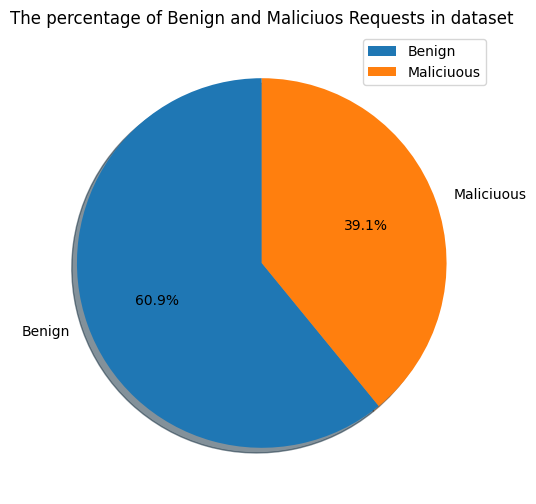

In [ ]:
labels = ['Benign','Maliciuous']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (11,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend([ "Benign","Maliciuous"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()


Text(0.5, 1.0, 'Number of requests from different IP adress')

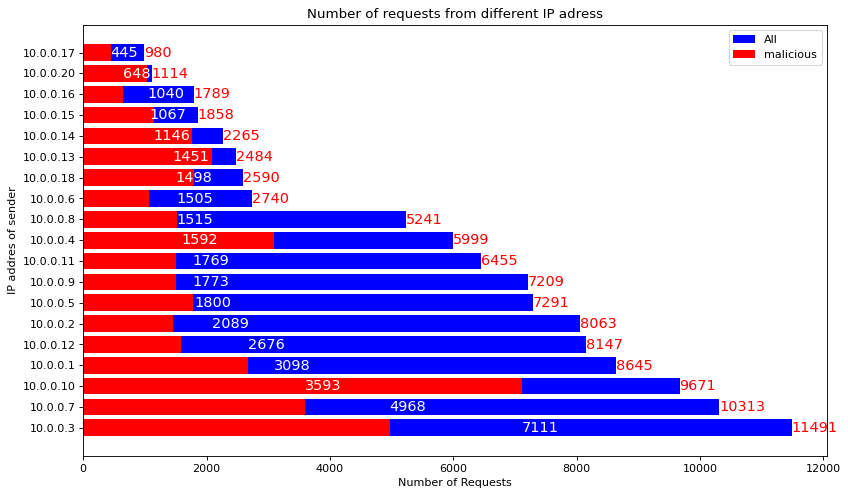

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='blue')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='red')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

In [ ]:
df = data.dropna()
x = df.drop(['dt','src','dst','label'], axis=1)
y = df.label
X = pd.get_dummies(x)

In [ ]:
M = Model(X, y)
M.LogisticRegression()
M.DecisionTree()
M.KNN()
M.RandomForest()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_lin

#############################################################################
Accuracy: 74.33% 

--------------------------------------------------------------------------
Best solver is :  newton-cg
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     20453
           1       0.61      0.69      0.65     10699

    accuracy                           0.74     31152
   macro avg       0.72      0.73      0.72     31152
weighted avg       0.75      0.74      0.75     31152
 

--------------------------------------------------------------------------
Confusion Matrix:
[[15721  3265]
 [ 4732  7434]]
--------------------------------------------------------------------------
Mean Square Error: 0.26
Root Mean Square Error: 0.51
--------------------------------------------------------------------------
--- 57.25685453414917 seconds --- time for LogisticRegression
#######

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import time




class Model:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, self.labels, random_state=42, test_size=0.3)




    def GradientBoosting(self):
        start_time = time.time()
        gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
        gb.fit(self.X_train, self.y_train)
        predicted_gb = gb.predict(self.X_test)
        accuracy_gb = accuracy_score(self.y_test, predicted_gb)
        mse_gb = mean_squared_error(self.y_test, predicted_gb)
        rmse_gb = np.sqrt(mse_gb)

        print("#############################################################################")
        print("Gradient Boosting Classifier Results:")
        print("--------------------------------------------------------------------------")
        print("Accuracy: %.2f%%" % (accuracy_gb * 100.0))
        print("--------------------------------------------------------------------------")
        print("Classification Report:")
        print(classification_report(self.y_test, predicted_gb))
        print("--------------------------------------------------------------------------")
        print("Confusion Matrix:")
        print(confusion_matrix(self.y_test, predicted_gb))
        print("--------------------------------------------------------------------------")
        print("Mean Squared Error: %.2f" % mse_gb)
        print("Root Mean Squared Error: %.2f" % rmse_gb)
        print("--------------------------------------------------------------------------")
        print("--- %.2f seconds --- time for Gradient Boosting" % (time.time() - start_time))
        print("#############################################################################")


In [ ]:
data = pd.read_csv('/content/dataset_sdn.csv')

In [ ]:
df = data.dropna()
x = df.drop(['dt','src','dst','label'], axis=1)
y = df.label
X = pd.get_dummies(x)

In [ ]:
M = Model(X, y)

M.GradientBoosting()

#############################################################################
Gradient Boosting Classifier Results:
--------------------------------------------------------------------------
Accuracy: 100.00%
--------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3828
         1.0       1.00      1.00      1.00      3918

    accuracy                           1.00      7746
   macro avg       1.00      1.00      1.00      7746
weighted avg       1.00      1.00      1.00      7746

--------------------------------------------------------------------------
Confusion Matrix:
[[3828    0]
 [   0 3918]]
--------------------------------------------------------------------------
Mean Squared Error: 0.00
Root Mean Squared Error: 0.00
--------------------------------------------------------------------------
--- 2.97 seconds --- time for Gradient Bo

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping




In [ ]:
df = pd.read_csv('/content/dataset_sdn.csv')

In [ ]:
X = df.drop('label', axis=1).values
y = df['label'].values


In [ ]:

np.random.seed(42)
data_size = 1000
num_features = 10
X = np.random.randn(data_size, num_features)
y = np.random.randint(0, 2, size=data_size)


In [ ]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}


In [ ]:
model = Sequential([
    GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    class_weight=class_weights, callbacks=[early_stopping])


Epoch 1/50
25/25 [==============================] - 8s 95ms/step - loss: 0.6950 - accuracy: 0.4700 - val_loss: 0.6934 - val_accuracy: 0.5050
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6916 - accuracy: 0.5325 - val_loss: 0.6937 - val_accuracy: 0.5100
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6903 - accuracy: 0.5350 - val_loss: 0.6945 - val_accuracy: 0.4850
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6879 - accuracy: 0.5462 - val_loss: 0.6957 - val_accuracy: 0.4850
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.5512 - val_loss: 0.6976 - val_accuracy: 0.4800
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6875 - accuracy: 0.5375 - val_loss: 0.6981 - val_accuracy: 0.4750


In [ ]:

y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int).flatten()


7/7 [==============================] - 1s 4ms/step


In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


print("GRU Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate mean squared error (MSE) and root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

# Compute and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

7/7 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5050
Test accuracy: 50.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.33      0.39        96
           1       0.52      0.66      0.58       104

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.51      0.49       200

Mean Squared Error: 0.4950
Root Mean Squared Error: 0.7036
Confusion Matrix:
[[32 64]
 [35 69]]
